# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [1]:
import pandas as pd

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

documents[0].lower()

# Representación TF

#diccionario 
vocab = set()

for doc in documents:
    for word in doc.lower().strip('.').split():
        vocab.add(word)
print(len(vocab)) 

20


In [2]:
dict_tf = {}
i = 0
for doc in documents:
    dict_tfd = {}
    words = doc.lower().strip('.').split()
    for term in vocab:
        count = words.count(term)  # Esto corrige el problema de subcadenas
        dict_tfd[term] = count
    print(doc, dict_tfd)
    dict_tf[i] = dict_tfd
    i += 1
print(dict_tf)


El gato se escondió debajo de la cama. {'jardín': 0, 'y': 0, 'escondió': 1, 'debajo': 1, 'gato': 1, 'estaba': 0, 'el': 1, 'cama': 1, 'limpieza': 0, 'jugaron': 0, 'en': 0, 'es': 0, 'importante': 0, 'limpia': 0, 'cómoda': 0, 'de': 1, 'perro': 0, 'del': 0, 'se': 1, 'la': 1}
La cama estaba limpia y cómoda. {'jardín': 0, 'y': 1, 'escondió': 0, 'debajo': 0, 'gato': 0, 'estaba': 1, 'el': 0, 'cama': 1, 'limpieza': 0, 'jugaron': 0, 'en': 0, 'es': 0, 'importante': 0, 'limpia': 1, 'cómoda': 1, 'de': 0, 'perro': 0, 'del': 0, 'se': 0, 'la': 1}
El perro y el gato jugaron en el jardín. {'jardín': 1, 'y': 1, 'escondió': 0, 'debajo': 0, 'gato': 1, 'estaba': 0, 'el': 3, 'cama': 0, 'limpieza': 0, 'jugaron': 1, 'en': 1, 'es': 0, 'importante': 0, 'limpia': 0, 'cómoda': 0, 'de': 0, 'perro': 1, 'del': 0, 'se': 0, 'la': 0}
La limpieza del jardín es importante. {'jardín': 1, 'y': 0, 'escondió': 0, 'debajo': 0, 'gato': 0, 'estaba': 0, 'el': 0, 'cama': 0, 'limpieza': 1, 'jugaron': 0, 'en': 0, 'es': 1, 'important

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(documents)
matriz_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())



In [8]:
#matriz_tfidf[0]['del']
# matriz.to_csv("matriz.csv" , index=True)

In [9]:
from sklearn.decomposition import PCA


# Representación TF-IDF

# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_tfidf)

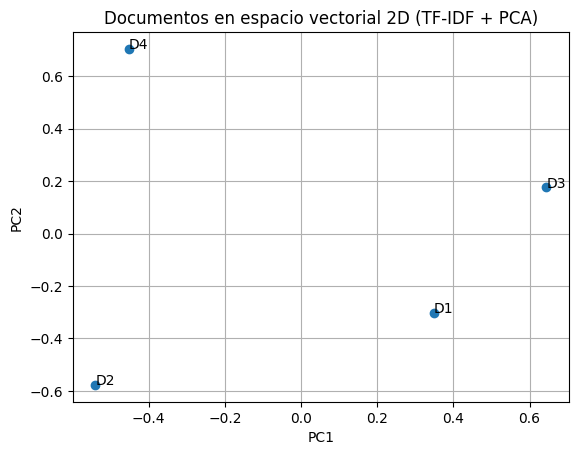

In [10]:
import matplotlib.pyplot as plt

plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()



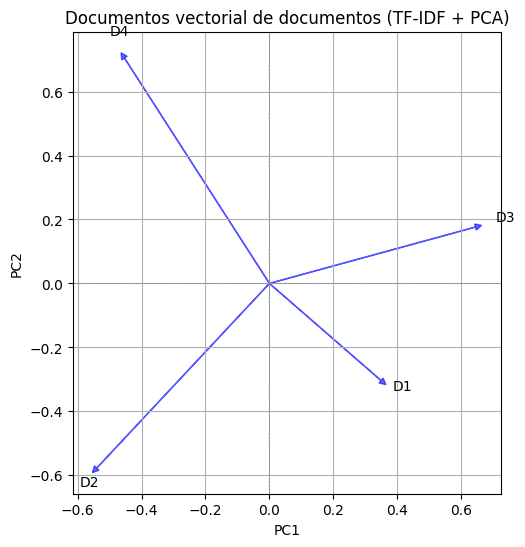

In [11]:
# Reducción PCA y visualización 3D

plt.figure(figsize=(10,6))
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec= 'blue', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)
plt.title("Documentos vectorial de documentos (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth = 0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth = 0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [12]:
consulta = "el gato duerme en la cama"
consulta = consulta.lower().strip('.')
consulta_palabras = consulta.split()

dict_consulta = {}
for term in vocab:
    dict_consulta[term] = consulta_palabras.count(term)
print("Vector de la consulta (TF):")
print(dict_consulta)


Vector de la consulta (TF):
{'jardín': 0, 'y': 0, 'escondió': 0, 'debajo': 0, 'gato': 1, 'estaba': 0, 'el': 1, 'cama': 1, 'limpieza': 0, 'jugaron': 0, 'en': 1, 'es': 0, 'importante': 0, 'limpia': 0, 'cómoda': 0, 'de': 0, 'perro': 0, 'del': 0, 'se': 0, 'la': 1}


In [13]:
import math

def coseno(v1, v2):
    dot = 0
    norm1 = 0
    norm2 = 0
    for key in v1:
        dot += v1[key] * v2[key]
        norm1 += v1[key] ** 2
        norm2 += v2[key] ** 2
    if norm1 == 0 or norm2 == 0:
        return 0
    return dot / (math.sqrt(norm1) * math.sqrt(norm2))

print("\nSimilitudes coseno entre la consulta y los documentos:")
for i in range(len(documents)):
    sim = coseno(dict_consulta, dict_tf[i])
    print(f"Similitud coseno con Documento {i+1}: {sim:.4f}")



Similitudes coseno entre la consulta y los documentos:
Similitud coseno con Documento 1: 0.6325
Similitud coseno con Documento 2: 0.3651
Similitud coseno con Documento 3: 0.5774
Similitud coseno con Documento 4: 0.1826


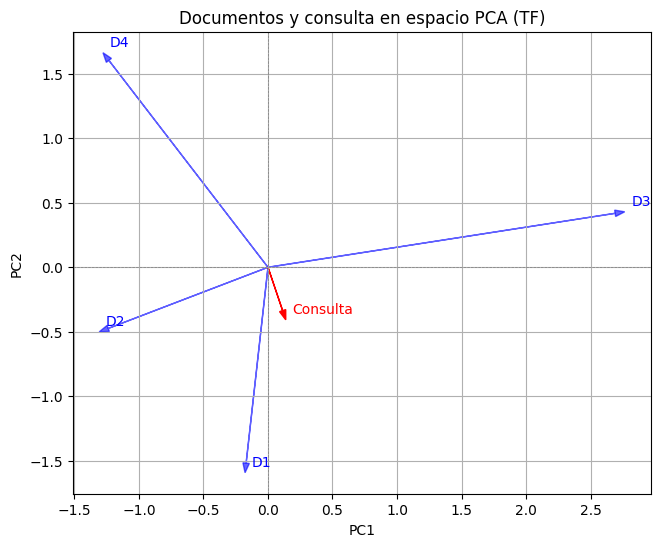

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertimos documentos a matriz para PCA
matriz_docs = pd.DataFrame(dict_tf).T  # documentos como filas

# Aplicamos PCA
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_docs.values)

# Convertimos la consulta a lista en el mismo orden que las columnas de matriz_docs
consulta_vector = [dict_consulta[term] for term in matriz_docs.columns]

# Proyectamos la consulta al mismo espacio PCA
consulta_2d = pca.transform([consulta_vector])[0]

# --- GRAFICAR flechas desde el origen ---
plt.figure(figsize=(8,6))

# Flechas de documentos
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.05, length_includes_head=True, alpha=0.6, color='blue')
    plt.text(x + 0.05, y + 0.05, f"D{i+1}", color='blue')

# Flecha de la consulta
xq, yq = consulta_2d
plt.arrow(0, 0, xq, yq, head_width=0.05, length_includes_head=True, color='red')
plt.text(xq + 0.05, yq + 0.05, "Consulta", color='red')

# Ajustes de gráfica
plt.title("Documentos y consulta en espacio PCA (TF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [16]:
def buscar_documentos(consulta, vocab, dict_tf):
    consulta = consulta.lower().strip('.')
    consulta_palabras = consulta.split()

    dict_consulta = {term: consulta_palabras.count(term) for term in vocab}

    import math
    def coseno(v1, v2):
        dot = 0
        norm1 = 0
        norm2 = 0
        for key in v1:
            dot += v1[key] * v2[key]
            norm1 += v1[key] ** 2
            norm2 += v2[key] ** 2
        if norm1 == 0 or norm2 == 0:
            return 0
        return dot / (math.sqrt(norm1) * math.sqrt(norm2))

    similitudes = []
    for i in range(len(dict_tf)):
        sim = coseno(dict_consulta, dict_tf[i])
        similitudes.append((i+1, sim))

    similitudes.sort(key=lambda x: x[1], reverse=True)
    return similitudes, dict_consulta


In [17]:
consulta = "el gato duerme en la cama"
ranking, dict_consulta = buscar_documentos(consulta, vocab, dict_tf)

print("Ranking de documentos por similitud:")
for doc_id, sim in ranking:
    print(f"Documento {doc_id}: similitud = {sim:.4f}")


Ranking de documentos por similitud:
Documento 1: similitud = 0.6325
Documento 3: similitud = 0.5774
Documento 2: similitud = 0.3651
Documento 4: similitud = 0.1826


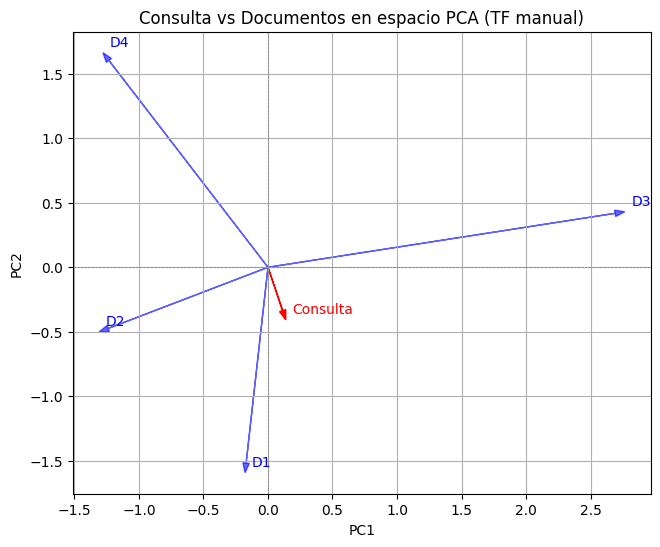

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convertimos dict_tf a DataFrame para usar en PCA
matriz_docs = pd.DataFrame(dict_tf).T  # documentos como filas

# Aplicamos PCA (2D)
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_docs.values)

# Convertimos el vector de la consulta a lista con el mismo orden de columnas
consulta_vector = [dict_consulta[term] for term in matriz_docs.columns]

# Proyectamos la consulta al mismo espacio PCA
consulta_2d = pca.transform([consulta_vector])[0]

# --- GRAFICACIÓN ---
plt.figure(figsize=(8,6))

# Flechas de los documentos
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.05, length_includes_head=True, alpha=0.6, color='blue')
    plt.text(x + 0.05, y + 0.05, f"D{i+1}", color='blue')

# Flecha de la consulta
xq, yq = consulta_2d
plt.arrow(0, 0, xq, yq, head_width=0.05, length_includes_head=True, color='red')
plt.text(xq + 0.05, yq + 0.05, "Consulta", color='red')

# Ajustes
plt.title("Consulta vs Documentos en espacio PCA (TF manual)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
